In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train_ctrUa4K.csv')
data_copy = data.copy()
data_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data_copy.replace(('Male', 'Female'), (1,0), inplace = True)
data_copy.replace(('Rural', 'Semiurban', 'Urban'), (1, 2, 3), inplace = True)
data_copy.replace(('Yes', 'No'), (1, 0), inplace = True)
data_copy.replace(('Y', 'N'), (1,0), inplace = True)
data_copy.replace(('Graduate', 'Not Graduate'), (1,0), inplace = True)
data_copy.replace(('Male', 'Female'), (1,0), inplace = True)
data_copy['Dependents'] = np.where((data_copy.Dependents == '3+'), int('4'), data_copy.Dependents)
data_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,3,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,3,1


In [4]:
data_copy.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data_copy['Gender'] = data_copy['Gender'].fillna(data_copy['Gender'].mode()[0])
data_copy['Married'] = data_copy['Married'].fillna(data_copy['Married'].mode()[0])
data_copy['Dependents'] = data_copy['Dependents'].fillna(data_copy['Dependents'].mode()[0])
data_copy['Self_Employed'] = data_copy['Self_Employed'].fillna(data_copy['Self_Employed'].mode()[0])
data_copy['ApplicantIncome'] = data_copy['ApplicantIncome'].fillna(data_copy['ApplicantIncome'].mean())
data_copy['CoapplicantIncome'] = data_copy['CoapplicantIncome'].fillna(data_copy['CoapplicantIncome'].mean())
data_copy['LoanAmount'] = data_copy['LoanAmount'].fillna(data_copy['LoanAmount'].mean())
data_copy['Loan_Amount_Term'] = data_copy['Loan_Amount_Term'].fillna(data_copy['Loan_Amount_Term'].mode()[0])
data_copy['Credit_History'] = data_copy['Credit_History'].fillna(data_copy['Credit_History'].mode()[0])
data_copy['Property_Area'] = data_copy['Property_Area'].fillna(data_copy['Property_Area'].mode()[0])
data_copy['Loan_Status'] = data_copy['Loan_Status'].fillna(data_copy['Loan_Status'].mode()[0])
data_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,1,1
610,LP002979,1.0,1.0,4,1,0.0,4106,0.0,40.000000,180.0,1.0,1,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,3,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,3,1


In [6]:
print(data_copy.shape)
data_copy.columns

(614, 13)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
#data_copy['ApplicantIncome'] = np.log10(data_copy['ApplicantIncome'])
#data_copy

Text(0.5, 0, 'Applicant Inacome')

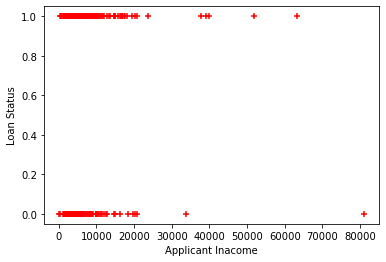

In [8]:
plt.scatter(data_copy['ApplicantIncome'], data_copy['Loan_Status'], marker = '+', color = 'r') 
plt.ylabel("Loan Status")
plt.xlabel("Applicant Inacome")


Applicant Income does not matter that much


Loan ID LP002317 could be a false data because there is a good chance of getting the approval or may be something different

In [9]:
data_copy[data_copy['ApplicantIncome'] > 50000] 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,1.0,1.0,4,1,0.0,51763,0.0,700.0,300.0,1.0,3,1
333,LP002101,1.0,1.0,0,1,0.0,63337,0.0,490.0,180.0,1.0,3,1
409,LP002317,1.0,1.0,4,1,0.0,81000,0.0,360.0,360.0,0.0,1,0


(588, 13)


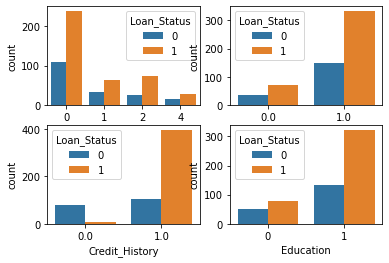

In [16]:
data_avg_income = data_copy[data_copy['ApplicantIncome']<15000]
print(data_avg_income.shape)
plt.subplot(2,2,1)
plt.xlabel('Dependents')
sns.countplot(data_avg_income['Dependents'], data = data_avg_income, hue = data_avg_income['Loan_Status'])
plt.subplot(2,2,2)
sns.countplot(data_avg_income['Gender'], data = data_avg_income, hue = data_avg_income['Loan_Status'])
plt.subplot(2,2,3)
sns.countplot(data_avg_income['Credit_History'], hue = data_avg_income['Loan_Status'])
plt.subplot(2,2,4)
sns.countplot(data_avg_income['Education'], hue = data_avg_income['Loan_Status'])

In average Applicant income dapendents matter for loan approval, more people  with zero dependents got loan approvals

Text(0.5, 0, 'Coapplicant Inacome')

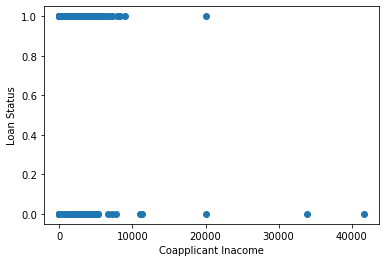

In [17]:
plt.scatter(data_copy['CoapplicantIncome'], data_copy['Loan_Status']) 
plt.ylabel("Loan Status")
plt.xlabel("Coapplicant Inacome")

Coapplicant Income also doesn't matter

In [18]:
data_copy[data_copy['CoapplicantIncome']> 30000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
581,LP002893,1.0,0.0,0,1,0.0,1836,33837.0,90.0,360.0,1.0,3,0
600,LP002949,0.0,0.0,4,1,0.0,416,41667.0,350.0,180.0,1.0,3,0


Loan Id LP002949 couldn't get approval because of 4 dependents, less Income and large Loan amount

Text(0.5, 0, 'Total Income')

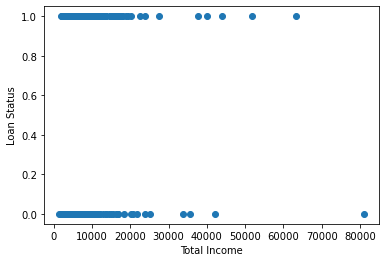

In [19]:
plt.scatter(data_copy['ApplicantIncome'] + data_copy['CoapplicantIncome'], data_copy['Loan_Status']) 
plt.ylabel("Loan Status")
plt.xlabel("Total Income")

Text(0.5, 0, 'LoanAmount')

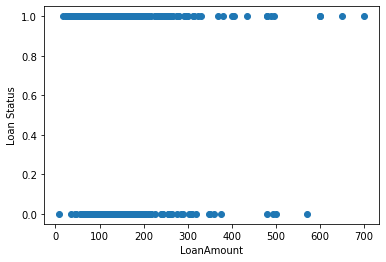

In [20]:
plt.scatter(data_copy['LoanAmount'], data_copy['Loan_Status'])
plt.ylabel("Loan Status")
plt.xlabel("LoanAmount")

Loan Amount also doesn't matter that much

In [22]:
data_copy[data_copy['LoanAmount']>500]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,LP001469,1.0,0.0,0,1,1.0,20166,0.0,650.0,480.0,1.0,3,1
155,LP001536,1.0,1.0,4,1,0.0,39999,0.0,600.0,180.0,0.0,2,1
171,LP001585,1.0,1.0,4,1,0.0,51763,0.0,700.0,300.0,1.0,3,1
369,LP002191,1.0,1.0,0,1,0.0,19730,5266.0,570.0,360.0,1.0,1,0
561,LP002813,0.0,1.0,1,1,1.0,19484,0.0,600.0,360.0,1.0,2,1


Loan ID LP002191 could be a false value because with good total income, zero deoendents and positive credit history will be good enough to get the loan apprval

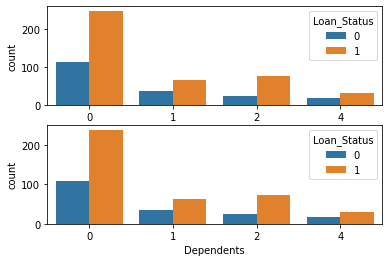

In [24]:
plt.subplot(2,1,1)
sns.countplot(data_copy['Dependents'], hue = data_copy['Loan_Status']) 
plt.subplot(2,1,2)
sns.countplot(data_avg_income['Dependents'], hue = data_avg_income['Loan_Status'])

Those who have zero dependents got more loan approvals

In [50]:
data_avg_income['Dependents'] = data_avg_income['Dependents'].astype(int)
data_avg_income.dtypes

<ipython-input-50-a8aff58fa7ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_avg_income['Dependents'] = data_avg_income['Dependents'].astype(int)


Loan_ID               object
Gender               float64
Married              float64
Dependents             int32
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

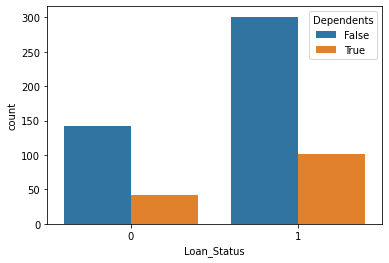

In [60]:
#plt.subplot(2,1,1)
one_two = data_avg_income[data_avg_income['Dependents']<2].count().unique()
three_four = data_avg_income[data_avg_income['Dependents']>1].count().unique()

sns.countplot(data_avg_income['Loan_Status'], hue = data_avg_income['Dependents']>1)

It's clear that applicants with zero or one depdendents got more approvals

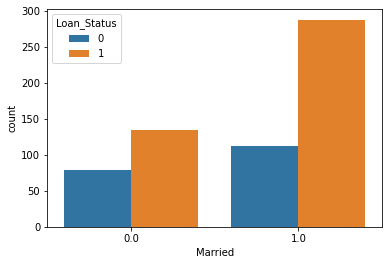

In [14]:
sns.countplot(data_copy['Married'], hue = data_copy['Loan_Status'])


Nearly double of unmarried people , married people got loan approvals

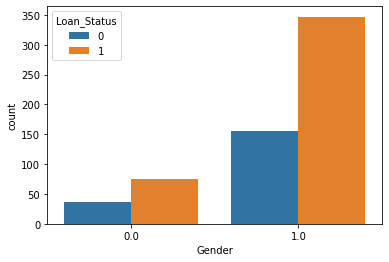

In [26]:
sns.countplot(data_copy['Gender'], hue = data_copy['Loan_Status'])

Male candidates are 6 times more than female candidates who have got loan approvals 

In [16]:
data_copy.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

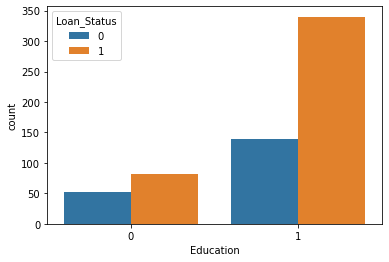

In [17]:
sns.countplot(data_copy['Education'], hue = data_copy['Loan_Status'])

Educated people got more loan approvals

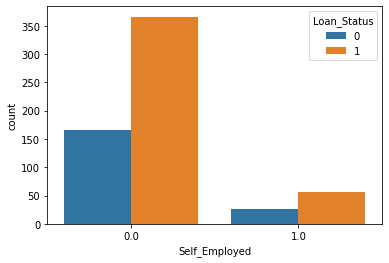

In [18]:
sns.countplot(data_copy['Self_Employed'], hue = data_copy['Loan_Status'])

MOre self_employed people got loan approvals

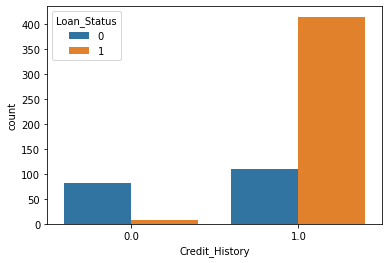

In [19]:
sns.countplot(data_copy['Credit_History'], hue = data_copy['Loan_Status'])

those people who don't have credit history don't get loan approvals

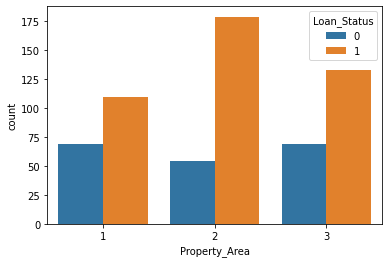

In [20]:
sns.countplot(data_copy['Property_Area'], hue = data_copy['Loan_Status'])

All property holders got loan approvals

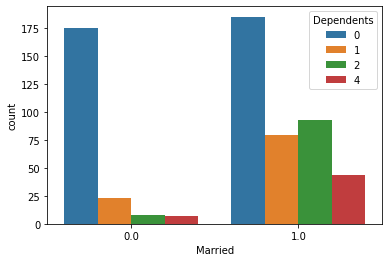

In [21]:
sns.countplot(data_copy['Married'],data = data_copy, hue = 'Dependents')

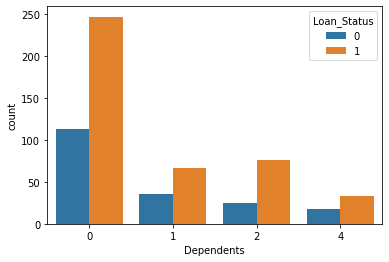

In [22]:
sns.countplot(data_copy['Dependents'], hue = data_copy['Loan_Status'])

Those applicant have zero dependents got more loan approvals

In [23]:
data_del = data_copy.drop(['Loan_ID'], axis = 'columns')
data_del

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,3,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,3,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,3,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,1,1
610,1.0,1.0,4,1,0.0,4106,0.0,40.000000,180.0,1.0,1,1
611,1.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,3,1
612,1.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,3,1


In [24]:
data_del.dtypes

Gender               float64
Married              float64
Dependents            object
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [25]:
data_del['Education']=data_del['Education'].astype(float)
data_del['Property_Area']=data_del['Property_Area'].astype(float)
data_del['Loan_Status']=data_del['Loan_Status'].astype(float)
data_del['Dependents']=data_del['Dependents'].astype(float)

data_del.dtypes
#sns.pairplot(data_del)

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

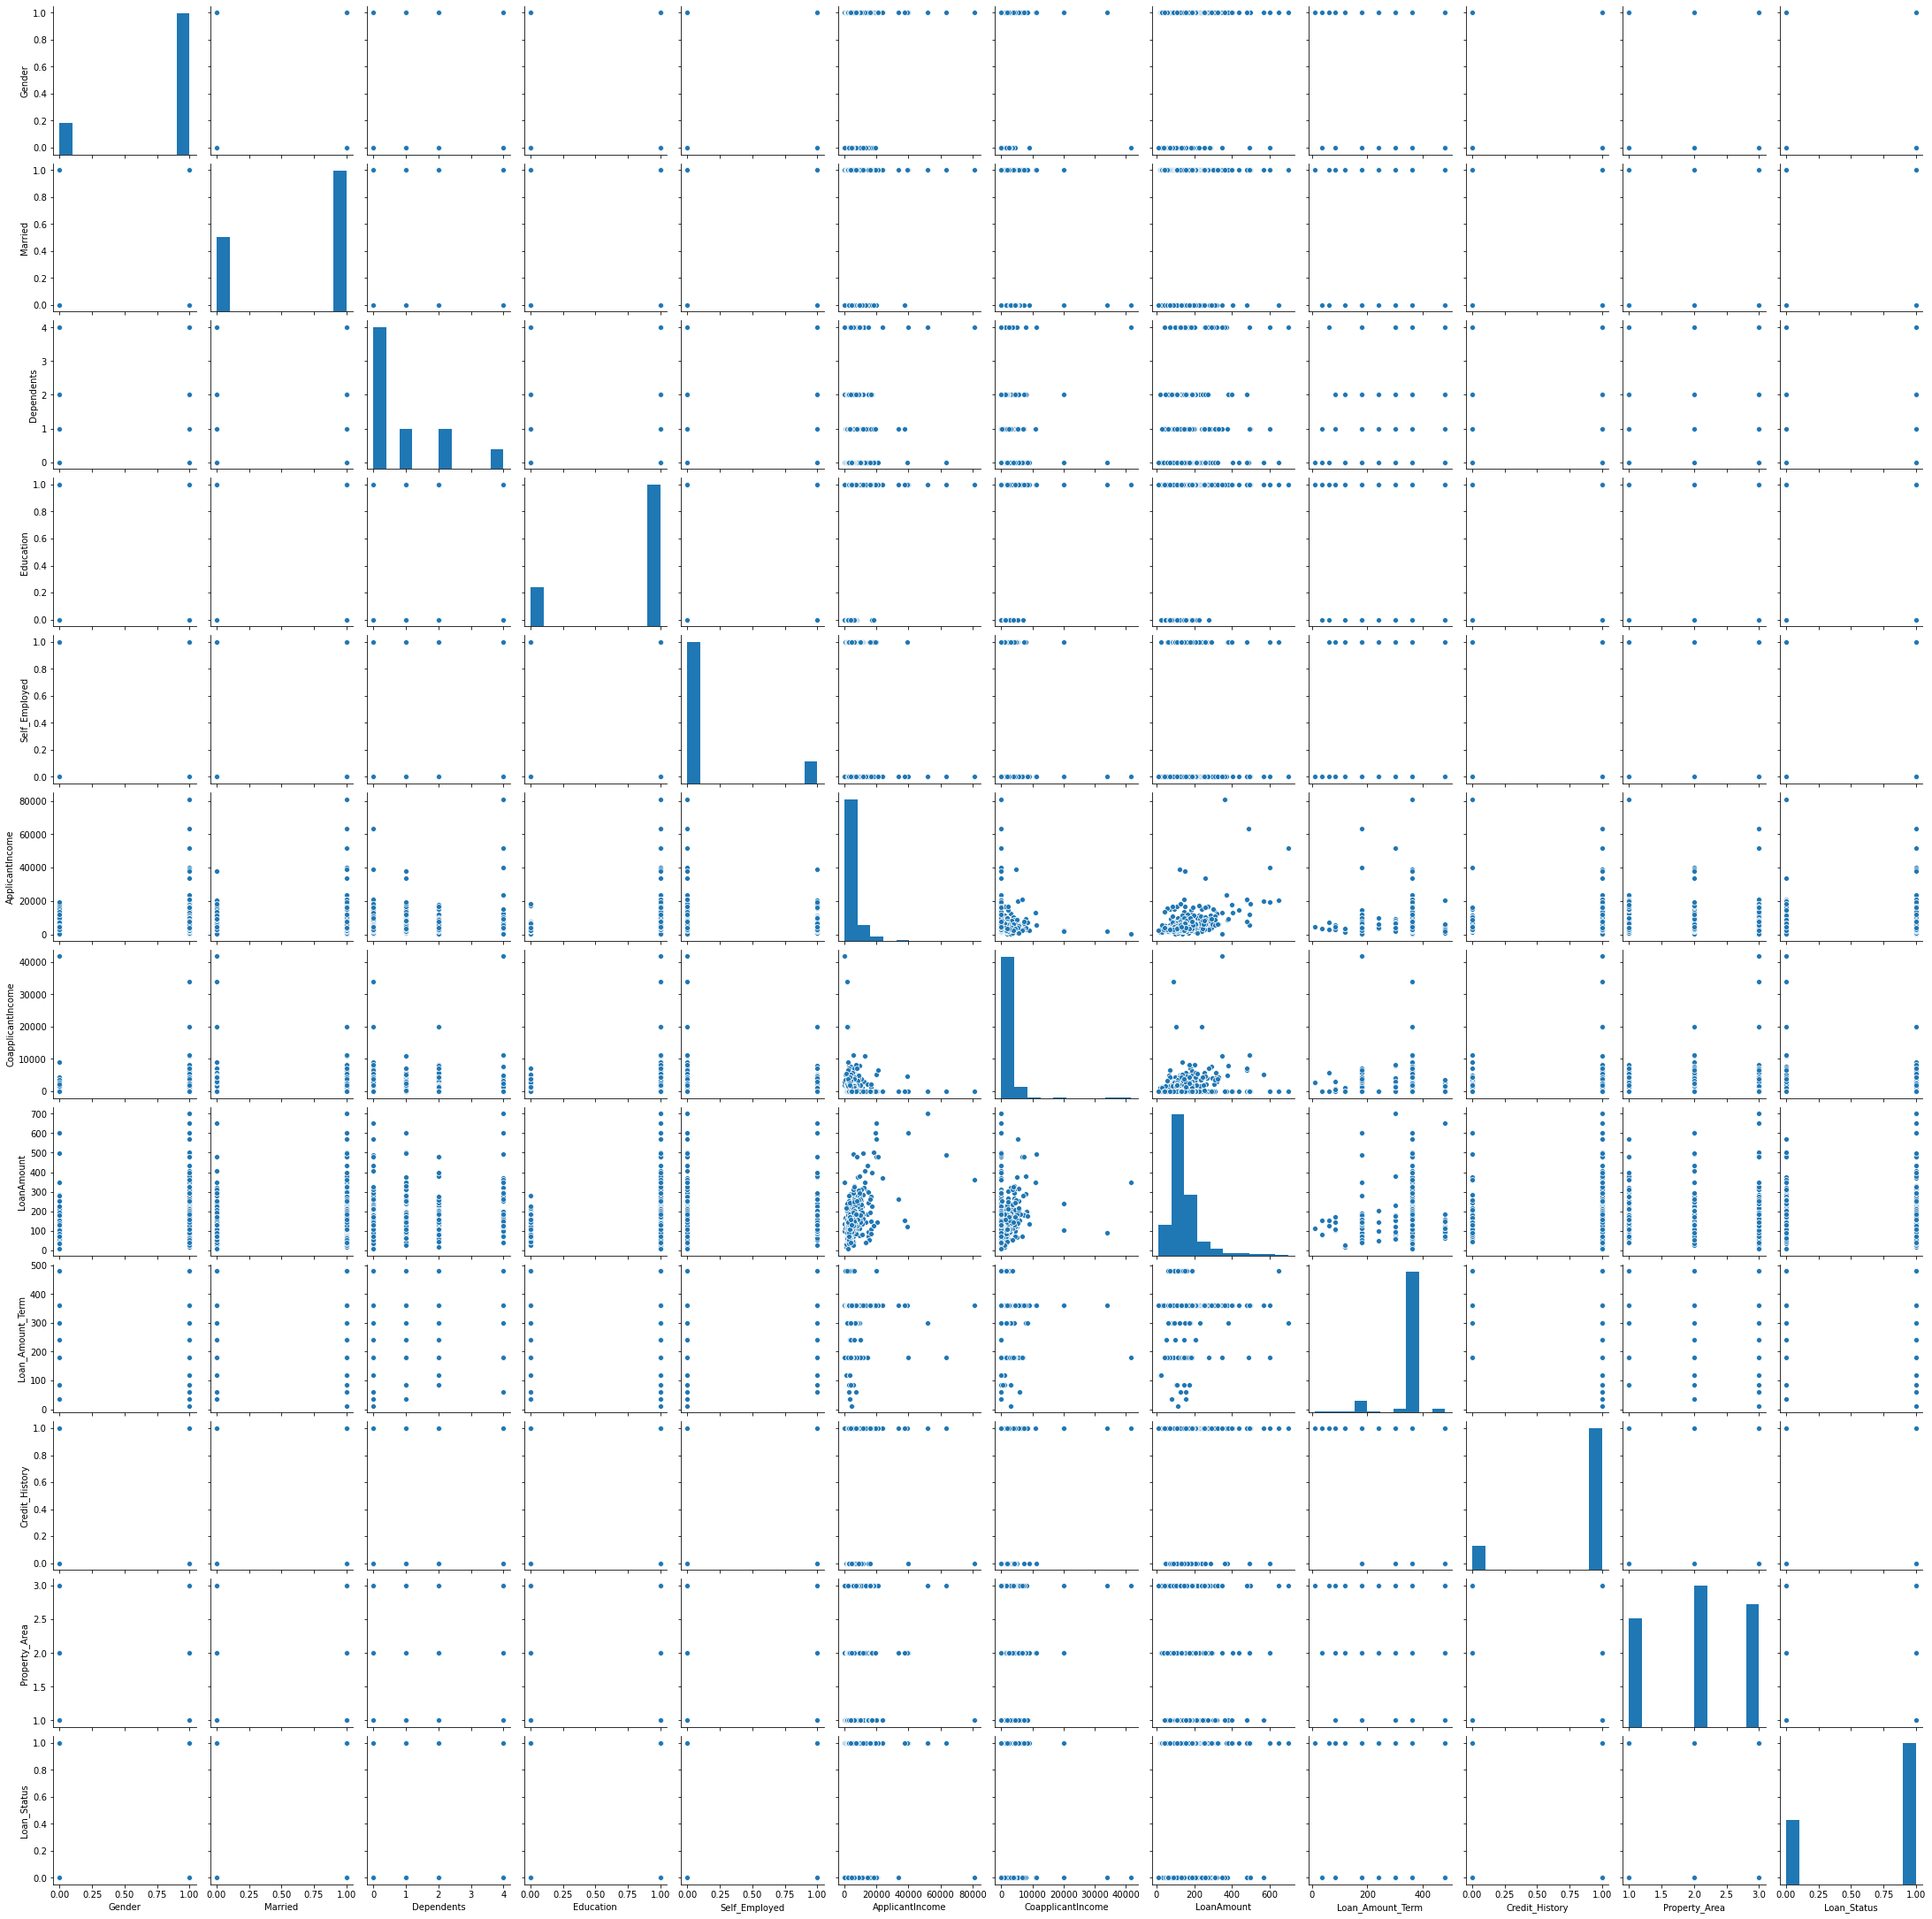

In [26]:
x = sns.pairplot(data_del)
x

<ipython-input-40-c4cfde2196f0>:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(areas, labels = ['Rural', 'Semiurban', 'Urban'], autopct='%1.1f%%',shadow=True, startangle=90)


([<matplotlib.patches.Wedge at 0x19f91273700>,
 [Text(-0.8724030565348554, 0.6700096319819903, 'Rural'),
  Text(-0.12915140728018942, -1.0923918317149515, 'Semiurban'),
  Text(0.9450351452578081, 0.5629463333458651, 'Urban')],
 [Text(-0.4758562126553756, 0.3654597992629038, '29.2%'),
  Text(-0.07044622215283058, -0.595850090026337, '37.9%'),
  Text(0.515473715595168, 0.3070616363704718, '32.9%')])

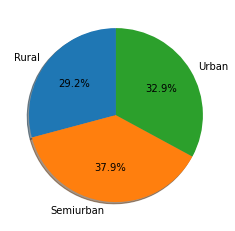

In [40]:
x = data_copy[data_copy['Property_Area']==1].count().unique()
y = data_copy[data_copy['Property_Area']==2].count().unique()
z = data_copy[data_copy['Property_Area']==3].count().unique()
areas = [x,y,z]
plt.pie(areas, labels = ['Rural', 'Semiurban', 'Urban'], autopct='%1.1f%%', shadow=True, startangle=90)

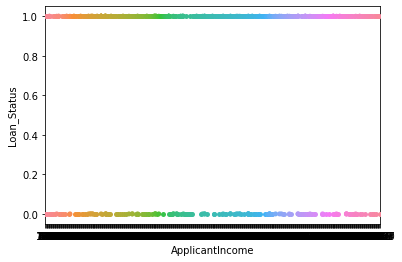

In [28]:
sns.stripplot(data_copy['ApplicantIncome'], data_copy['Loan_Status'])
